# Characterizing the Labelling of Cre lines Based on Cortical Depth


## Abstract

Our experiment aims to analyze the shared Cre-lines between the Allen Institute Brain Observatory and Cell Types databases and discover how each Cre-line differentially labels the layers of the cortex, by utilizing the recording depth metric in both databases. We found that Cux2-CreERT2, Nr5a1-Cre, Ntsr1-Cre_GN220, Rbp4-Cre_KL100, Scnn1a-Tg3-Cre, and Tlx3-Cre_PL56 were all layer specific, and Pvalb-IRES-Cre and Sst-IRES-Cre were scattered throughout the brain. We further characterized the non-layer specific Cre lines by comparing their electrophysiological properties, and found differences in the input resistance and the threshold for both ramp, short and long square stimuli. Ultimately, we demonstrated the differential labelling of the Cre-line in various cortical layers within the primary visual cortex, and how the more widely expressed cells may have different functions based on their electrophysiological characteristics. 

## Research Question

How do the shared Cre-lines between the Allen Institute Brain Observatory and Cell Types databases differentially label the layers of the primary visual cortex based on cortical depth?

# Background and Prior Work

   In our project, we aim to investigate relationship between the labelling of various Cre-lines and cortical depth. The mouse cortex is divided into six different layers, and each cortical area of the brain contains all six layers. Past experiments have established layer 4 as the input layer and layer 5 as the output layer (Cajal, 1899). These specific layers can be targeted by different Cre-lines, which utilize the Cre/LoxP system to target specific subsets of genes. The system works by crossing a driver mouse that expresses Cre-recombinase in front of the promoter of the gene of interest and a reporter mouse with the LoxP sites. The system will disrupt the targeted gene only in the cells expressing Cre, which results in the specific targeting of cells with the gene of interest. These mouse lines can also cross with fluorescent reporter mice to mark these cells. The Cre-lines our project focuses on are Sst-IRES-Cre, Pvalb-IRES-Cre, Vip-IRES-Cre, Cux2-CreERT2, Nr5a1-Cre, Ntsr1-Cre_GN220, Rbp4-Cre_KL100, Rorb-IRES-Cre, Scnn1a-Tg3-Cre, and Tlx3-Cre_PL56. Each of the Cre-lines are defined by the expression of their specific genes and are variably expressed in neurons throughout the brain. It is useful to define the depth and location of the cells labelled by each Cre-line, in addition to the characteristics of their gene expression patterns, to distinguish gene localization for future manipulation and Cre-line candidates. There is abundant literature on utilizing these tissue specific Cre-lines to determine the electrophysiological properties and neurotransmitter specific excitability of neurons expressing these genes (Sundberg, 2017). This led to our question of how the Cre-lines differentially label the layers of the primary visual cortex based on cortical depth? 
    
   Our first database, the Allen Brain Institute Cell Types database, includes the morphology and electrophysiology data of various cells targeted with specific Cre-lines. The database includes the brain region and the Cre-line that targeted a subset of neurons. The experimenters recorded from different cells by using the Cre/LoxP system to express GFP in the cells specific to the Cre-line.  The experimenters then injected various currents into the cells and collected data on many internal electrophysiological properties of the cell. We will utilize the normalized depth metric in this database to graph a boxplot for the recordings of each Cre-line, to compare the depth of expression between these Cre-lines. After filtering the data for each Cre-line, our dataset resulted in 895 observations. We will also use the electrophysiology data to further analyze the differences between the Cre-lines. The electrophysiology data includes numerous features, such as the resting membrane potential and the adaptation rate. 
    
   Our second database, the Allen Brain Institute Brain Observatory, includes calcium imaging experiments on various cell types in the visual cortex. Calcium imaging utilizes calcium indicators, such as GCaMP6, to label calcium as it travels through the cell. Calcium indirectly signals cell activity since many of the cell’s activities require calcium. For instance, calcium triggers the process of vesicle docking to release neurotransmitters. This database recorded the activity of specific cells in response to different images, by utilizing Cre-lines. From this database, we will again utilize the imaging depth metric to indicate the expression of each Cre-line in a specific layer. After filtering the data for each Cre-line, the number of observations for this database totaled to 110 experiments. 

 
 

### References (include links):
(1) Cajal Santiago Ramón y. (1899). Textura del sistema nervioso del hombre y de los vertebrados. Madrid: Impr. y Libr. de Nicolás Moya.

(2) Sundberg, Sofie Charlotte, et al. (2017). “Cre-Expressing Neurons in Visual Cortex of Ntsr1-Cre GN220 Mice Are Corticothalamic and Are Depolarized by Acetylcholine.” Journal of Comparative Neurology, vol. 526, no. 1, pp. 120–132., doi:10.1002/cne.24323

## Hypothesis


We hypothesize each Cre-line that is shared between the two databases, the Allen Brain Cell Types and Brain Observatory, will label a specific cortical layer in the primary visual cortex.

- Since the labelling of the Cre-lines have already been characterized, we believe the results of our cortical depth should compare to the layers defined in the literature. 
- Also based on the literature, there should be a few Cre-lines that are not specific to a cortical layer, and instead consist of scattered expression throughout the cortex. 

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [1]:
# Import the necessary toolboxes from the allensdk
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

#Here I have imported any packages that I felt would be necessary to manipulate the data 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


## Data Wrangling

 
Our data wrangling consists of indexing and subsetting the databases, so we only analyze the Cre-lines shared between the database and only in the primary visual cortex.

In [2]:
#We'll initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

In [3]:
#We are not interested in the human cells, so we will specify that we want the mouse cells
mouse_cells = ctc.get_cells(species=[CellTypesApi.MOUSE])

In [4]:
#We will also later anaylze the ephys features of our Cre-lines so we store this into another dataframe
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')

In [5]:
#We will then place the data we have collected into a pandas dataframe inorder to make 
#easier to manipulate when wrangling our data

#here we do pd to access the pandas class and create a dataframe with the mouse data
mouse_df = pd.DataFrame(mouse_cells)

#we can then see how our data frame looks by using the head method to display
#the first 5 rows of the df
mouse_df = mouse_df.set_index('id')
mouse_df

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN
485909730,positive,"[8881.0, 953.839501299405, 7768.22695782726]",Mus musculus,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,dendrite-only,,485250100,right,0.478344
323865917,positive,"[8125.0, 904.841803028986, 7819.69986630448]",Mus musculus,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,dendrite-only,,322489588,left,0.608590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512322162,positive,"[8892.78224916347, 1601.33558333116, 8097.3709...",Mus musculus,Ctgf-2A-dgCre;Ai14(IVSCC)-240529.03.02.01,6b,385,VISp,Ctgf-T2A-dgCre,spiny,intact,dendrite-only,,511856495,right,0.977622
488473535,negative,"[9177.35470186006, 972.994403914619, 8421.8095...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-212867.03.01.01,2/3,385,VISp,Rorb-IRES2-Cre,aspiny,NA,None,,487607572,left,0.240614
467003163,positive,"[9559.14360513319, 1615.03869355735, 2565.0012...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-172652.02.02.01,4,385,VISp,Rorb-IRES2-Cre,spiny,truncated,None,,322489498,right,0.363275


In [6]:
#We will join both databases to analyze the same cells across both datasets
mouse_ephys_df = mouse_df.join(ephys_features)
mouse_ephys_df

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,...,14.738000,1.391268,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,...,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036
485909730,positive,"[8881.0, 953.839501299405, 7768.22695782726]",Mus musculus,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,...,2.888133,1.520193,-54.031254,-57.385419,-77.750005,3.042933,3.517684,3.274181,-101.000000,-76.928391
323865917,positive,"[8125.0, 904.841803028986, 7819.69986630448]",Mus musculus,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,...,3.467847,1.317042,-57.281254,-56.895833,-70.218751,2.974194,3.156117,2.946463,-88.406250,-69.402855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512322162,positive,"[8892.78224916347, 1601.33558333116, 8097.3709...",Mus musculus,Ctgf-2A-dgCre;Ai14(IVSCC)-240529.03.02.01,6b,385,VISp,Ctgf-T2A-dgCre,spiny,intact,...,4.959787,1.536120,-58.406254,-56.625003,-75.250008,4.761417,5.427357,3.906444,-90.312500,-74.700264
488473535,negative,"[9177.35470186006, 972.994403914619, 8421.8095...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-212867.03.01.01,2/3,385,VISp,Rorb-IRES2-Cre,aspiny,NA,...,14.494840,1.524034,-59.718754,-59.343753,-78.606255,1.349980,1.354347,1.475020,-85.468758,-78.499512
467003163,positive,"[9559.14360513319, 1615.03869355735, 2565.0012...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-172652.02.02.01,4,385,VISp,Rorb-IRES2-Cre,spiny,truncated,...,4.925565,1.576434,-54.593754,-56.468750,-72.125003,3.766885,3.608179,3.673033,-85.656258,-71.000069


In [7]:
#We will now switch gears to retrieve some data from the brain observatory
# Allen specific toolboxes for brain observatory database
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# We will create an instance of the Brain Observatory Cache as an object, "boc."
boc = BrainObservatoryCache(manifest_file='/datasets/allen-brain-observatory/visual-coding-2p/manifest.json')
# We'll save the list of cre lines as a variable, 'cre-lines'.
cre_lines = boc.get_all_cre_lines()
print("all cre lines: " + str(cre_lines))

# We'll save the list of possible structures as a variable, 'brain_areas'.
brain_areas = boc.get_all_targeted_structures()
print("all brain regions: " + str(brain_areas))

all cre lines: ['Cux2-CreERT2', 'Emx1-IRES-Cre', 'Fezf2-CreER', 'Nr5a1-Cre', 'Ntsr1-Cre_GN220', 'Pvalb-IRES-Cre', 'Rbp4-Cre_KL100', 'Rorb-IRES2-Cre', 'Scnn1a-Tg3-Cre', 'Slc17a7-IRES2-Cre', 'Sst-IRES-Cre', 'Tlx3-Cre_PL56', 'Vip-IRES-Cre']
all brain regions: ['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']


In [8]:
# With this code we can look at a list of the transgenic lines that exist within our dataframe
#.unique filters out any replicates so it gives us one solid list of the cre-lines present
transgenic_lines = mouse_df['transgenic_line'].unique()


#Here we are synthesizing the list of Cre-lines we are interested in, we do this by comparing the list of
#crelines in both database, see which ones match, then storing them in a list which we call
#overlapping_lines

#this code checks to see which lines overlap between the two list of lines from each database 
#transgenic is from the celltypes database and cre is from the boc database
overlapping_lines = list(set(transgenic_lines).intersection(cre_lines))
overlapping_lines

#this lines of interest was a list we had originally synthesized on our own but we wont be using this anymore
lines_of_interest = ['Cux2-CreERT2', 'Fezf2-CreER', 'Nr5a1-Cre', 'Ntsr1-Cre_GN220', 'Rbp4-Cre_KL100', 'Rorb-IRES-Cre', 'Scnn1a-Tg3-Cre', 'Tlx3-Cre_PL56']

In [9]:
#Here we are looking to take a mean of the normalized depth, from the cre lines 
#we are interested in the means and std to make a values to summarize the values for
#normalized depth from these lines, the std will help us factor in a certain margin of error

#made empty lists to store values outside of function
all_means = []
all_STDs = []

for t_line in overlapping_lines:
    
    #here we are subsetting a dataframe with the our lines of interest
    df = mouse_df[mouse_df['transgenic_line'] == t_line]
    
    #takeing means and std of the normalized depth
    all_means.append((df['normalized_depth'].mean()))
    all_STDs.append((df['normalized_depth'].std()))
    
print(all_means)
print(all_STDs)



[0.43869783902822934, 0.5883811248599581, 0.8598172219738782, 0.5460062995779061, 0.5740963454865228, 0.48023906281031786, 0.4097840696277034, 0.4088539456766254, 0.5180447501779165, 0.5092193858111211]
[0.21323277810445868, 0.1763292656196453, 0.07319338592047993, 0.08503518249004169, 0.10306308804898014, 0.06906113879209759, 0.11255571948165036, 0.05443352417037506, 0.1360436070572142, 0.1734816613125188]


In [10]:
#We will now create a database will cells specifically in the primary visual cortex and only from the Cre-lines 
#that overlap between the two databases
exps = boc.get_experiment_containers(targeted_structures = ['VISp'], cre_lines= overlapping_lines)
exps_df = pd.DataFrame(exps)
exps_df

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510911,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],False
1,644909309,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),348105,Ntsr1-Cre_GN220;Ai148-348105,[],False
2,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
3,528792730,350,VISp,Nr5a1-Cre,Ai93(TITL-GCaMP6f),248894,Nr5a1-Cre;Camk2a-tTA;Ai93-248894,[],False
4,581026086,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297507,Sst-IRES-Cre;Ai148(CAM)-297507,[],False
...,...,...,...,...,...,...,...,...,...
105,604866830,175,VISp,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),326489,Vip-IRES-Cre;Ai148-326489,[],False
106,511510718,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),231584,Cux2-CreERT2;Camk2a-tTA;Ai93-231584,[],False
107,511510989,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),222431,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-222431,[],False
108,580043437,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297504,Sst-IRES-Cre;Ai148(CAM)-297504,[],False


In [11]:
#We show that our new dataframe consists only of the Cre lines shared between the two databases 
exps_df['cre_line'].unique()

array(['Scnn1a-Tg3-Cre', 'Ntsr1-Cre_GN220', 'Cux2-CreERT2', 'Nr5a1-Cre',
       'Sst-IRES-Cre', 'Pvalb-IRES-Cre', 'Rbp4-Cre_KL100',
       'Tlx3-Cre_PL56', 'Rorb-IRES2-Cre', 'Vip-IRES-Cre'], dtype=object)

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

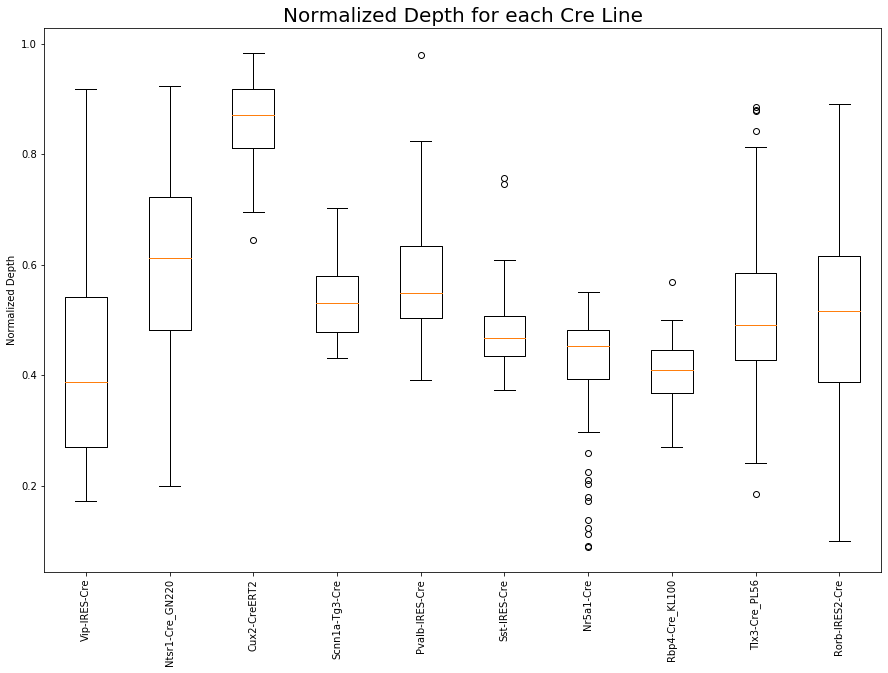

In [12]:
#Here we will graph a boxplot for the normalized depth metric from the Cell Types database from all of our Cre-lines

fig,ax = plt.subplots(figsize = (15,10))

a_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[0]]
b_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[1]]
c_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[2]]
d_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[3]]
e_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[4]]
f_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[5]]
g_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[6]]
h_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[7]]
i_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[8]]
j_df = mouse_df[mouse_df['transgenic_line']==overlapping_lines[9]]



a_ft = a_df['normalized_depth'].dropna()
b_ft = b_df['normalized_depth'].dropna()
c_ft = c_df['normalized_depth'].dropna()
d_ft = d_df['normalized_depth'].dropna()
e_ft = e_df['normalized_depth'].dropna()
f_ft = f_df['normalized_depth'].dropna()
g_ft = g_df['normalized_depth'].dropna()
h_ft = h_df['normalized_depth'].dropna()
i_ft = i_df['normalized_depth'].dropna()
j_ft = j_df['normalized_depth'].dropna()


data = [a_ft,b_ft,c_ft,d_ft,e_ft,f_ft,g_ft,h_ft,i_ft,j_ft]

ax.boxplot(data)
ax.set_xticklabels(['Vip-IRES-Cre',
 'Ntsr1-Cre_GN220',
 'Cux2-CreERT2',
 'Scnn1a-Tg3-Cre',
 'Pvalb-IRES-Cre',
 'Sst-IRES-Cre',
 'Nr5a1-Cre',
 'Rbp4-Cre_KL100',
 'Tlx3-Cre_PL56',
 'Rorb-IRES2-Cre'])

ax.set_ylabel('Normalized Depth')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Normalized Depth for each Cre Line", fontsize = 20)

plt.show()

### Figure 1. 
This boxplot graphs the normalized depth for each Cre line, with the data from the Cell Types database. The top of the graph represents the deepest layer and the bottom represents the more superficial layers of cortex. The graph reveals Ntsr1-Cre labels the deepest layer of cortex, compared to the other lines. The Sst-IRES-Cre, Rorb-IRES2-Cre, and the Vip-IRES-Cre lines show more spread out expression. All of the other lines vary between the middle layers of cortex.

[Text(0, 0, 'Scnn1a-Tg3-Cre'),
 Text(0, 0, 'Ntsr1-Cre_GN220'),
 Text(0, 0, 'Cux2-CreERT2'),
 Text(0, 0, 'Nr5a1-Cre'),
 Text(0, 0, 'Sst-IRES-Cre'),
 Text(0, 0, 'Pvalb-IRES-Cre'),
 Text(0, 0, 'Rbp4-Cre_KL100'),
 Text(0, 0, 'Tlx3-Cre_PL56'),
 Text(0, 0, 'Rorb-IRES2-Cre'),
 Text(0, 0, 'Vip-IRES-Cre')]

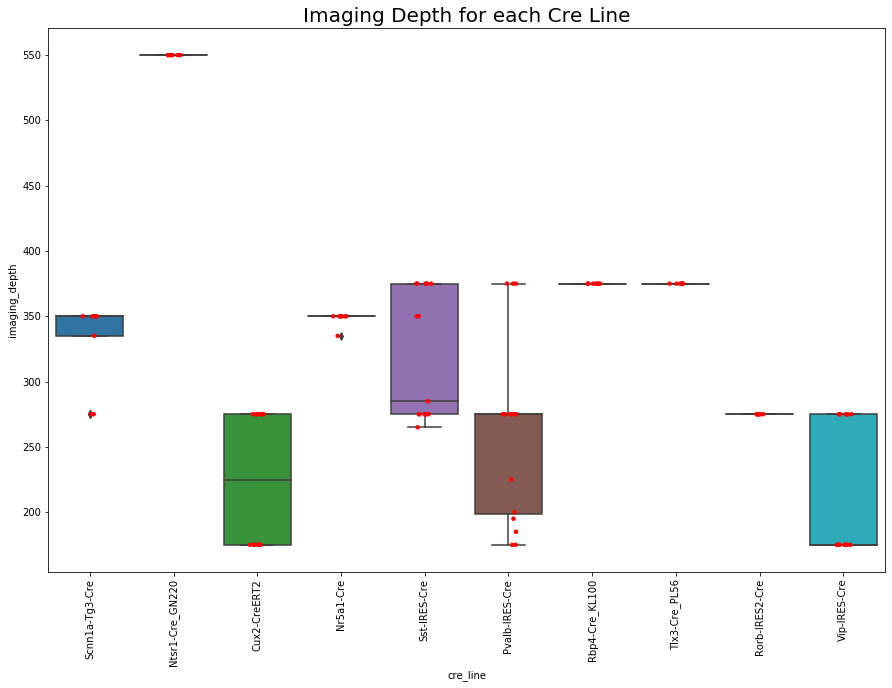

In [13]:
#We will make another boxplot for the imaging depth collected in the Brain Observatory database for each Cre line

fig,ax = plt.subplots(figsize=(15,10))


ax = sns.boxplot(x='cre_line', y='imaging_depth', data=exps_df)
ax = sns.stripplot(x='cre_line', y='imaging_depth', data=exps_df, color="red", jitter=1.0, size=4.5)
plt.title("Imaging Depth for each Cre Line", fontsize = 20)


ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Figure 2.
This boxplot graphs the normalized depth for each Cre line, with the data from the Brain Observatory database. The top of the graph represents the deepest layer and the bottom represents the more superficial layers of cortex. The graph reveals Ntsr1-Cre labels the deepest layer of cortex, compared to the other lines. In this boxplot, both the Sst-IRES-Cre and the Pvalb-IRES-Cre lines demonstrate the greatest spread of expression across cortex. Rbp4-Cre and Tlx3-Cre both show dense expression in the same layer. Vip-IRES-Cre and Cuz2-Cre both show expression in two different layers. Scnn1a-Tg3-Cre and Nr5a1-Cre both show expression in the same layer.

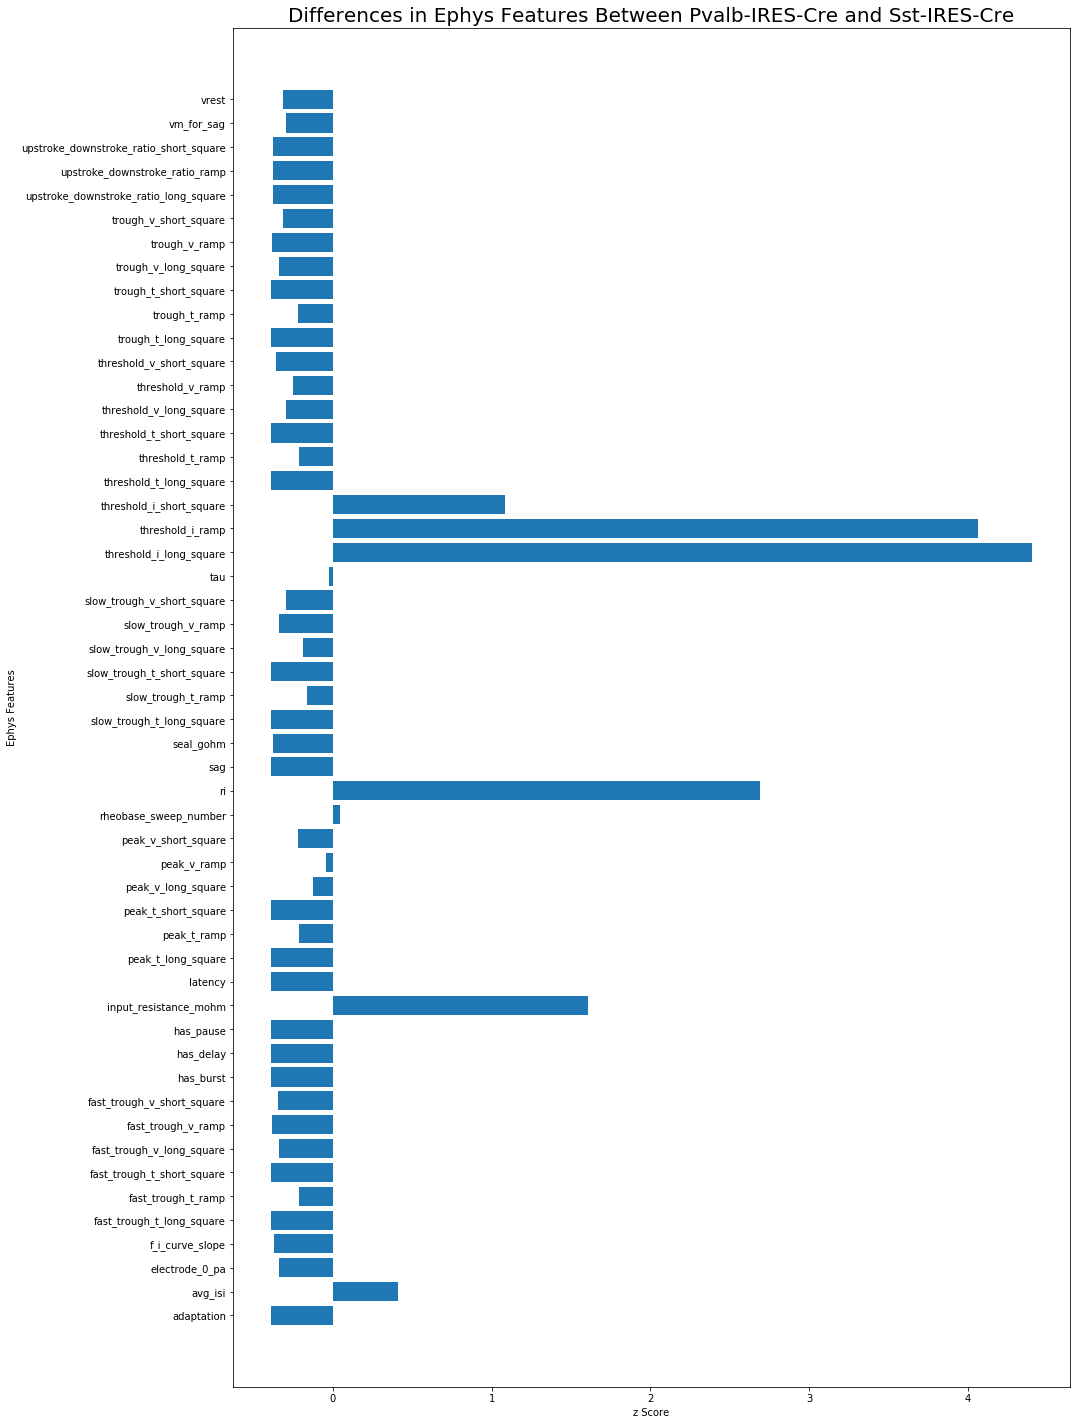

In [14]:
#We decided to further analyze Pvalb-IRES-Cre and Sst-IRES-Cre since the boxplots revealed scattered expression

#Making new df with the two Cre lines we are interested in in which we will look at their ephys features
ephys_lines_pvalb = mouse_ephys_df.loc[(mouse_ephys_df['transgenic_line'] == 'Pvalb-IRES-Cre')]
ephys_lines_pvalb

ephys_lines_sst = mouse_ephys_df.loc[(mouse_ephys_df['transgenic_line'] == 'Sst-IRES-Cre')]
ephys_lines_sst



ephys_columns = ephys_features.columns.tolist()
ephys_columns

#We remove the extra ID columns in the database, so we only plot the ephys features
for column in ephys_columns:
    if 'id' in column:
        ephys_columns.remove(column)

# Set up the figure
fig,ax = plt.subplots(figsize=(15,25))

#Here we are subsetting space aside to make our list of difference for our figure
differences = []


#In this loop we iterate through the columns of both dataframes and calculate the mean and the difference between 
#the means of each column in order to calculate the zscore which is the value used to plot our data in the figure
for col in ephys_columns:
    
    pvalb_mean = ephys_lines_pvalb[col].mean()
    sst_mean = ephys_lines_sst[col].mean()
    difference = abs(sst_mean - pvalb_mean)
    
    differences.append(difference)
    
diff_zscore = stats.zscore(differences)
plt.barh(ephys_columns, diff_zscore)
plt.title("Differences in Ephys Features Between Pvalb-IRES-Cre and Sst-IRES-Cre", fontsize = 20)
ax.set_ylabel('Ephys Features')
ax.set_xlabel('z Score')
plt.show()



### Figure 3.
This bargraph demonstrates the different z-scores between two different Cre-lines: Pvalb-IRES-Cre and Sst-IRES-Cre. The graph reveals differences in the threshold for ramp, short and long square stimuli. There are also differences in the input resistance and RI. 

## Conclusion & Discussion

   In our project, we sought to compare the labelling of the Cre-lines in each cortical layer of the primary visual cortex by using the normalized depth metric of the Cell Types database and  the measured depths reported in the Brain Observatory database. Our box plots revealed many of the Cre-lines correspond to a specific layer of the primary visual cortex, which aligns with the literature that some Cre-lines are specifically expressed in particular layers. Both boxplots reveal that Ntsr1-Cre labels the deepest layer of cortex (Figure 1, 2). In Figure 1, the Sst-IRES-Cre, Rorb-IRES2-Cre, and the Vip-IRES-Cre lines show more spread out expression. Yet, in Figure 2, only the Sst-IRES-Cre and the Pvalb-IRES-Cre lines demonstrate a greater spread of expression across cortex. The Rbp4-Cre and Tlx3-Cre lines both show dense expression in the same layer and the Scnn1a-Tg3-Cre and Nr5a1-Cre lines both show expression in the same, more superficial layer (Figure 2). The Vip-IRES-Cre and Cuz2-Cre both show expression in two different layers (Figure 2).
   
   From the documentation of the Allen Brain Institute, we know Ntsr1-Cre labeled cells are expressed in Layer VI, Cux2-CreERT2 cells are located in Layer II/III/IV, Tlx3-Cre cells are found in Layer V pyramidal neurons, Nr5la-Cre neurons were locally expressed in Layer IV, Scnn1a-Cre expressed in Layer IV, and Rbp4-Cre labeled neurons were largely found in Layer V. The imaging depths for each of these lines in the Allen Brain Observatory database were shown as Ntsr1-Cre at 550, Cux2-CreERT2 at 225, Tlx3-Cre at 375, Nr51a-Cre at 350, Scnn1a-Cre at 350 and Rbp4-Cre at 385 (Figure 2). Although our results align loosely with the layers defined in the Allen Brain Institute, the depths are comparatively shallow when matched with the depth ranges of the layers defined in the literature. This could be due to experimental procedures performed at the Allen Brain Institute since the calcium imaging with GcaMP often compresses the cortex slightly to focus the observing microscope. Our analysis was further limited since we could not directly compare the depth metrics between the two databases. The Cell Types database normalizes their measurements on a scale by measuring the distance from the pia as 0 to the white matter as 1, but the Brain Observatory database consists of the actual depth of the recording. Given that the normalization for Cell Types data was not clear, we were unable to normalize the Brain Observatory data to conduct further analyses between the databases. 
	
   From the Allen Insitute documentation, there should have been four Cre-lines that were more widely expressed throughout the primary visual cortex: Rorb-Cre, Pvalb-IRES-Cre, ViP-Cre, and Sst-IRES-Cre. Yet, we found that only Pvalb-IRES-Cre and Sst-IRES-Cre displayed scattered expression (Figure 1). Thus, we examined the electrophysiological features of the Pvalb-IRES-Cre and Sst-IRES-Cre lines to further discriminate between these non-layer specific Cre-lines. There were significant response differences in the threshold for both ramp, short, and long square stimuli (Figure 3). The cells tended to have similar thresholds at about -40 mV. Pvalb-Cre neurons tended to be more bursty firing between 60 and 80 spikes with an 800 pA ramp stimulus, while Sst-Cre neurons fired between 5 and 15 times with the same stimulus. For long square stimulus, Pvalb-Cre neurons showed a higher threshold of 170 pA and the Sst-Cre neurons were observed firing at 120 pA with a more consistent firing rate and shorter refractory period than Pvalb-Cre cells. Future studies could further analyze the electrophysiological features between all the Cre-lines, not just the non-layer specific Cre lines, by utilizing the electrophysiology data in the Cell Types database.
